In [2]:
import pandas as pd
import numpy as np
import scipy as sp 
#import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
data = pd.read_csv("LoanStats3c.csv")

C:\Users\AbhinavGarg\Anaconda3\lib\site-packages\pandas\io\parsers.py:1170: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


# Data Cleaning

### Data description and corresponding usage

* id - keep (no analysis)

* member_id - keep (no analysis)

* loan_amnt - relevant

* funded_amnt  - relevant but nearly same as loan_amnt (see correlation matrix) - try to create a new feature

* funded_amnt_inv - almost same as funded_amnt ( can be removed)

* term - 36 or 60 - (changes made -Kaustubh **this can give the algorithm the idea of whether shorter loans are better or longer ones**)

* int_rate - relevant (can vary as a function of risk of the corresponding loan)

* installment - (very relevant)takes in account the term factor and loan_amnt together - we can remove 'term' column - but we should not remove loan_amnt because it gives the information about how big a loan is ? . 

* grade - LC determined value (grading scheme not clear) (changes made- Abhinav *** this has high corelation with int_rates as seen from data and lending club site https://www.lendingclub.com/public/rates-and-fees.action . This can be removed***)

* sub_grade - LC determined value (grading scheme not clear) * grade - LC determined value (grading scheme not clear) (changes made- Abhinav *** this has high corelation with int_rates as seen from data and lending club site https://www.lendingclub.com/public/rates-and-fees.action . This can be removed***)


* emp_title - Not relevant (since it does not gives us information about the financial condition of the borrower) (changes made- Abhinav *** We will try to add this feature and see the accuracy on our model***)

* emp_length - does provide information about the credibility of the borrower (needs cleaning - use regular expressions)

* home_ownership - relevant (provides information about the financial condition and other collateral the borrower has)

* annual_inc - very relevant (if the annual income of the borrower is not greater than the annual installments needs to be paid then its a bad loan)

* verification_status - relevant (we can provide a value corresponding to each factor or let the algorithm decide these values

* issue_d - irrelevant (does not provide any information about anything)

* loan_status - LABEL (Current loans needs to be removed)

* pymnt_plan - relevant(may add some information )

* url - irrelevant

* desc - relevant (may provide information about the intensions or behavior of the borrower) - Needs to remove NaN by some value

* purpose - relevant 

* title - same as purpose (remove either)

* zip_code - not relevant (can be replaced by the addr_state )

* dti - very relevant (debt to income ratio) - can think of removing income and loan_amnt for once

* delinq_2yrs - relevant (in terms of frequency)

* earlies_cr_line - relevant (can remove the month -year is relevant)

* inq_last_6mths - relevant inquiries ragarding loans in last 6 months 

* mths_since_last_delinq - relevant (need to deal with missing values)

* mths_since_last_record - relevant (need to deal with missing values)

* open_acc - relevant (open credit lines)

* pub_rec - relevant (negative factor)

* revol_bal - relevant (may be correlated to the amount of credit)

* total_acc - relevant (total number of credit lines currently in borrower's credit file )

* initial_list_status - relevant (initial listing status of loan ) (W,F -meaning not known till now)( changes made-Abhinav *** w means whole loan and f means fractional loan. This is weather investor as invested whole money or partly in the loan . This does not give any idea about the loan taker so can be removed***)

* out_prncp - relevant 

* total_pymnt - relevant but correlated to out_prncp (see correlation)

* total_pymnt_inv - nearly same as total_pymnt (see similarity)

* total_rec_prncp - principal recieved till date (relevant)

* total_rec_late_fee - late fees recieved to date (relevance to be decided )

* total_rec_int - interest recieved till date

* recoveries - post charge off gross recovery (to be decided)

* collection_recovery_fee - post charge off collection fee () 

* last_pymnt_d - may be relevant

* last_pymnt_amnt - may be relevant

* next_pymnt_d - may be relevant

* last_credit_pull_d - The most recent month LC pulled credit for this loan ( may or may not be relevant)

* collections_12_mths_ex_med - Number of collections in 12 months excluding medical collections (relevant)

* mths_since_last_major_derog - Months since most recent 90-day or worse rating **find out the meaning** and then decide relevance

* policy_code - relevant (1 or 2) -decided according to the FICO scores

* application_type - individual or joint ( may be relevant)

* annual_inc_joint - relevant (but have lots of missing values for individual accounts)

* dti_joint - same case as above

* verification_status_joint - same as above

* acc_now_delinq - the number of accounts on which the borrower is now delinquent (relevant)

* tot_coll_amt - total collection amounts ever owed (relevant)

* tot_cur_bal - total current balance of all accounts (relevant) - try to make a new feature 

* open_acc_6m - Number of open trades in the last 6 months (many NaN values to deal with)

* open_il_6m - Number of currently active installment trades (lot of NaN values)

* open_il_12m - Number of installment accounts opened in past 12 months

* open_il_24m - Number of installment accounts opened in past 24 months

* mths_since_rcnt_il - months since most recent installment accounts openend 

* total_bal_il - total current balance of all installment accounts

* il_util - relevant (deal with NaNs) (ratio of total current balaance to high creditt/credit limit on all install acct

* open_rv_12m - Number of revolving trades in past 12 months (may or may not be )

* open_rv_24m - in past 24 months (Same)

* max_bal_bc - Maximum current balance owed on all revolving accounts (relevant) NaNs

* all_util - Balance to credit limit on all trades (relevant but NaNs)

* total_credit_rv - Total credit line on open revolving accounts (very relevant) -Try to create a new feature vector

* inq_fi - Number of personal finance inquiries (Lot of NaNs (scrutiny)

* total_fi_tl - Number of finance trades (may or may not be) (Lot of NaNs)

* inq_last_12m -Number of credit inquiries in past 12 months (Lot of NaNs) (scrutiny)

### First we need to remove the Current loans

In [7]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_credit_rv,inq_fi,total_fi_tl,inq_last_12m
0,36805548,39558264,10400,10400,10400,36 months,6.99%,321.08,A,A3,...,NaN,NaN,NaN,NaN,NaN,NaN,19400,NaN,NaN,NaN
1,38098114,40860827,15000,15000,15000,60 months,12.39%,336.64,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,184500,NaN,NaN,NaN
2,37612354,40375473,12800,12800,12800,60 months,17.14%,319.08,D,D4,...,NaN,NaN,NaN,NaN,NaN,NaN,5700,NaN,NaN,NaN
3,37822187,40585251,9600,9600,9600,36 months,13.66%,326.53,C,C3,...,NaN,NaN,NaN,NaN,NaN,NaN,27600,NaN,NaN,NaN
4,37842129,40605224,21425,21425,21425,60 months,15.59%,516.36,D,D1,...,NaN,NaN,NaN,NaN,NaN,NaN,21500,NaN,NaN,NaN


### Removing the Current loans

In [8]:
df = data[-(data.loan_status == 'Current')]

### Removing NaN values

In [9]:
df = df[-df.loan_status.isnull()]

In [10]:
df.loan_status

3                 Fully Paid
5                Charged Off
6         Late (31-120 days)
11                Fully Paid
12                Fully Paid
17                Fully Paid
24                Fully Paid
28        Late (31-120 days)
29                Fully Paid
32                Fully Paid
35                Fully Paid
37                Fully Paid
40                Fully Paid
50                Fully Paid
55                Fully Paid
56                Fully Paid
61        Late (31-120 days)
68               Charged Off
69                Fully Paid
70                Fully Paid
75                Fully Paid
78                Fully Paid
84                Fully Paid
85                Fully Paid
87                Fully Paid
90                Fully Paid
97               Charged Off
103               Fully Paid
112               Fully Paid
119               Fully Paid
                 ...        
235558           Charged Off
235559            Fully Paid
235561    Late (31-120 days)
235563        

In [12]:
sum(df.loan_status == 'In Grace Period')

1928

### Removing the "In Grace Period" Loans

These loans will not help us in classifying new loan as bad or good 

In [13]:
df = df[-(data.loan_status == 'In Grace Period')]

C:\Users\AbhinavGarg\Anaconda3\lib\site-packages\pandas\core\frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


In [14]:
len(df.loan_status)

71364

## Kaustubh - I am adding this snippet which will calculate the number of "null" values in each column

In [16]:
missing = []

for col in df.columns:
    missing.append(sum(df[col].isnull()))
    print (col + " " + " -- " + " " + str(sum(df[col].isnull())))



id  --  0
member_id  --  0
loan_amnt  --  0
funded_amnt  --  0
funded_amnt_inv  --  0
term  --  0
int_rate  --  0
installment  --  0
grade  --  0
sub_grade  --  0
emp_title  --  3703
emp_length  --  0
home_ownership  --  0
annual_inc  --  0
verification_status  --  0
issue_d  --  0
loan_status  --  0
pymnt_plan  --  0
url  --  0
desc  --  65340
purpose  --  0
title  --  0
zip_code  --  0
addr_state  --  0
dti  --  0
delinq_2yrs  --  0
earliest_cr_line  --  0
inq_last_6mths  --  0
mths_since_last_delinq  --  35266
mths_since_last_record  --  57398
open_acc  --  0
pub_rec  --  0
revol_bal  --  0
revol_util  --  49
total_acc  --  0
initial_list_status  --  0
out_prncp  --  0
out_prncp_inv  --  0
total_pymnt  --  0
total_pymnt_inv  --  0
total_rec_prncp  --  0
total_rec_int  --  0
total_rec_late_fee  --  0
recoveries  --  0
collection_recovery_fee  --  0
last_pymnt_d  --  143
last_pymnt_amnt  --  0
next_pymnt_d  --  65373
last_credit_pull_d  --  10
collections_12_mths_ex_med  --  0
mths_si

## I am going to add this column to a new data frame "null" under "missing" row



In [11]:
colu = list(df.columns)

missing = np.array(missing)

missing = missing.reshape(1,-1)

null = pd.DataFrame(data = missing,columns = colu)

## So that at any point of time we can simply write the following to find out the number of missing values in the column

In [12]:
null['desc']

0    65340
Name: desc, dtype: int64

### Giving Binary values to the loan_status variable which classifies them as good(1) or bad(0) loan

In [13]:
Label = []

for status in df.loan_status:
    if status == "Fully Paid":
        status = 1
        Label.append(status)
    else:
        status = 0
        Label.append(status)
        
        

In [14]:
df.loan_status = Label

In [15]:
df.loan_status

3     1
5     0
6     0
11    1
12    1
17    1
24    1
28    0
29    1
32    1
35    1
37    1
40    1
50    1
55    1
...
235599    1
235600    0
235601    1
235603    1
235605    1
235606    1
235608    1
235609    1
235616    1
235619    1
235620    0
235621    0
235622    1
235625    0
235626    1
Name: loan_status, Length: 71364, dtype: int64

In [16]:
sum(df.loan_status)

52023

In [17]:
df.corr()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,
member_id,1.000000,-0.026698,-0.026698,-0.026478,-0.040536,-0.008128,-0.024568,0.064463,-0.000418,-0.085196,0.016350,-0.049292,0.012721,-0.010274,0.019694,-0.006455,0.090916,0.090950,-0.082753,-0.082583,...
loan_amnt,-0.026698,1.000000,1.000000,0.999997,0.954410,0.410343,-0.061475,0.019603,-0.000564,-0.010466,-0.053376,0.022019,0.185368,-0.125125,0.351322,0.192695,0.184388,0.184386,0.770111,0.770103,...
funded_amnt,-0.026698,1.000000,1.000000,0.999997,0.954410,0.410343,-0.061475,0.019603,-0.000564,-0.010466,-0.053376,0.022019,0.185368,-0.125125,0.351322,0.192695,0.184388,0.184386,0.770111,0.770103,...
funded_amnt_inv,-0.026478,0.999997,0.999997,1.000000,0.954396,0.410374,-0.061480,0.019575,-0.000588,-0.010487,-0.053329,0.022066,0.185379,-0.125148,0.351305,0.192679,0.184419,0.184418,0.770093,0.770090,...
installment,-0.040536,0.954410,0.954410,0.954396,1.000000,0.407429,-0.049969,0.013022,0.011715,0.012371,-0.060426,0.005783,0.178358,-0.107900,0.341046,0.176189,0.155336,0.155335,0.748161,0.748142,...
annual_inc,-0.008128,0.410343,0.410343,0.410374,0.407429,1.000000,0.084076,-0.226094,0.052931,0.057332,-0.067830,-0.086484,0.146846,-0.036271,0.325084,0.204482,0.033185,0.033187,0.371695,0.371716,...
loan_status,-0.024568,-0.061475,-0.061475,-0.061480,-0.049969,0.084076,1.000000,-0.156588,-0.036069,-0.038670,0.045524,-0.032456,-0.013895,0.011811,0.008608,0.054324,-0.416765,-0.416757,0.481835,0.481849,...
dti,0.064463,0.019603,0.019603,0.019575,0.013022,-0.226094,-0.156588,1.000000,-0.011217,-0.000778,-0.004305,0.093337,0.275328,-0.073690,0.130162,0.192634,0.068848,0.068844,-0.062300,-0.062329,...
delinq_2yrs,-0.000418,-0.000564,-0.000564,-0.000588,0.011715,0.052931,-0.036069,-0.011217,1.000000,0.032516,-0.573496,-0.056361,0.048707,-0.017882,-0.038085,0.122631,0.027844,0.027839,-0.017764,-0.017795,...
inq_last_6mths,-0.085196,-0.010466,-0.010466,-0.010487,0.012371,0.057332,-0.038670,-0.000778,0.032516,1.000000,0.012876,-0.085696,0.102062,0.071866,-0.028749,0.137499,-0.002693,-0.002702,-0.020588,-0.020599,...


### Since correlation of funded amount and loan amount is 1.00000 we can remove one of them (we'll remove funded_amnt)

In [18]:
clean_data = df #so that we can keep the cleaned data as a back up

In [19]:
df.drop("funded_amnt",1,)

,id,member_id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,
3,37822187,40585251,9600,9600,36 months,13.66%,326.53,C,C3,Admin Specialist,10+ years,RENT,69000,Source Verified,Dec-2014,1,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,...
5,37662224,40425321,7650,7650,36 months,13.66%,260.20,C,C3,Technical Specialist,< 1 year,RENT,50000,Source Verified,Dec-2014,0,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,...
6,37800722,40563521,12975,12975,36 months,17.86%,468.17,D,D5,Sales,10+ years,RENT,60000,Source Verified,Dec-2014,0,n,https://www.lendingclub.com/browse/loanDetail....,NaN,house,...
11,37741884,40504905,2500,2500,36 months,11.99%,83.03,B,B5,Manufacturing Engineer,< 1 year,MORTGAGE,89000,Source Verified,Dec-2014,1,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,...
12,37642222,40405288,5250,5250,36 months,11.44%,172.98,B,B4,Store Manager,2 years,RENT,26000,Not Verified,Dec-2014,1,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,...
17,37742142,40505198,2000,2000,36 months,14.99%,69.33,C,C5,practice plan associate,8 years,RENT,32200,Not Verified,Dec-2014,1,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,...
24,36109709,38821388,2000,2000,36 months,12.99%,67.38,C,C2,NaN,n/a,RENT,21312,Verified,Dec-2014,1,n,https://www.lendingclub.com/browse/loanDetail....,NaN,medical,...
28,37822030,40585070,18450,18450,36 months,14.31%,633.36,C,C4,construction foreman,10+ years,MORTGAGE,108000,Not Verified,Dec-2014,0,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,...
29,37692106,40465191,28000,28000,60 months,10.49%,601.70,B,B3,Humana Cares Manager,2 years,MORTGAGE,67000,Source Verified,Dec-2014,1,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,...
32,10089665,11941194,8000,8000,36 months,10.49%,259.99,B,B3,Senior Logistics Analyst,3 years,MORTGAGE,94000,Not Verified,Dec-2014,1,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,...


### Trying to clean emp_length

In [20]:
df.emp_length = df.emp_length.apply(lambda x : x[:-6] if 'years' in x else '<1')

In [21]:
df.emp_length = df.emp_length.astype(object)

### Removing emp_title, issue_d

In [22]:
columns_to_remove = ['emp_title', 'issue_d', 'url', 'zip_code']

In [23]:
for column in columns_to_remove:
    df = df.drop(column, axis=1)

In [24]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,desc,purpose,title,addr_state,
3,37822187,40585251,9600,9600,9600,36 months,13.66%,326.53,C,C3,10+,RENT,69000,Source Verified,1,n,NaN,debt_consolidation,Debt consolidation,NJ,...
5,37662224,40425321,7650,7650,7650,36 months,13.66%,260.20,C,C3,<1,RENT,50000,Source Verified,0,n,NaN,debt_consolidation,Debt consolidation,AZ,...
6,37800722,40563521,12975,12975,12975,36 months,17.86%,468.17,D,D5,10+,RENT,60000,Source Verified,0,n,NaN,house,Home buying,FL,...
11,37741884,40504905,2500,2500,2500,36 months,11.99%,83.03,B,B5,<1,MORTGAGE,89000,Source Verified,1,n,NaN,home_improvement,Home improvement,MN,...
12,37642222,40405288,5250,5250,5250,36 months,11.44%,172.98,B,B4,2,RENT,26000,Not Verified,1,n,NaN,debt_consolidation,Debt consolidation,MD,...


In [25]:
df.purpose.describe()

count                  71364
unique                    13
top       debt_consolidation
freq                   44681
Name: purpose, dtype: object

In [26]:
df.title.describe()

count                  71364
unique                  1010
top       Debt consolidation
freq                   43623
Name: title, dtype: object

In [27]:
sum(df.emp_length == 10)

0

In [28]:
df.emp_length.dtype

dtype('O')

In [29]:
sum(df.emp_length.isnull()) # no null values

0

In [30]:
import re #regular expressions (ABhinav dekh le)

In [31]:
emp = []
for i in df.emp_length:
    emp.append(re.sub('[^A-Za-z0-9]+', '', i))


In [32]:
df.emp_length = emp

In [33]:
df.emp_length.dtype

dtype('O')

#We need to change the data type to int64

In [34]:
df.emp_length = df.emp_length.astype(int)

In [35]:
df.emp_length.dtype #done

dtype('int64')

In [36]:
df.emp_length.head

<bound method Series.head of 3     10
5      1
6     10
11     1
12     2
17     8
24     1
28    10
29     2
32     3
35    10
37     5
40     4
50     4
55     1
...
235599     9
235600     1
235601    10
235603     4
235605     1
235606     1
235608    10
235609     1
235616     1
235619     7
235620     5
235621     3
235622    10
235625    10
235626     3
Name: emp_length, Length: 71364, dtype: int64>

In [37]:
df.int_rate.head()


3      13.66%
5      13.66%
6      17.86%
11     11.99%
12     11.44%
Name: int_rate, dtype: object

#Converting the datatype of "int_rate" from object to float64 and removing "%" sign

In [38]:
df.int_rate = [x[:-1] for x in df.int_rate]

In [39]:
df.int_rate.head()

3      13.66
5      13.66
6      17.86
11     11.99
12     11.44
Name: int_rate, dtype: object

In [40]:
df.int_rate = df.int_rate.astype(float)

In [41]:
df.int_rate.describe()

count    71364.000000
mean        14.374701
std          4.429493
min          6.000000
25%         11.670000
50%         13.980000
75%         16.990000
max         26.060000
Name: int_rate, dtype: float64

In [42]:
null.int_rate #so no missing values

0    0
Name: int_rate, dtype: int64

## This plot is showing the mean value of loan_status for a particular home_ownership value

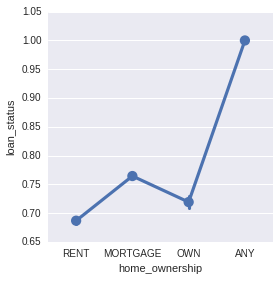

In [43]:
sns.factorplot(x="home_ownership",y="loan_status",data = df)# 'ANY' has only one data point

In [45]:
np.mean(df[df.home_ownership == "OWN"].loan_status)

0.71905465288035453

In [46]:
df.annual_inc.dtype

dtype('float64')

In [47]:
null['id'][0]

0

In [48]:
to_remove = []

for i in df.columns:
    if null[i][0] == 71364:
        to_remove.append(i)
        
to_remove

['annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'inq_fi',
 'total_fi_tl',
 'inq_last_12m']

In [49]:
df1 = df #keeping the version of df as df1

In [50]:
for feat in to_remove:
    df = df.drop(feat,axis = 1)

In [51]:
len(df.columns)

53

In [52]:
for i in df.columns:
    if null[i][0] > 50000:   #These features should also be removed as it'll be difficult to fill these missing values from a regression fitting as the available values are very less and missing values are very large
        print i

desc
mths_since_last_record
next_pymnt_d
mths_since_last_major_derog


### Plotting against total_credit_rv

In [53]:
df.total_credit_rv

3     27600
5     18300
6     15700
11    24300
12    22000
17    15300
24    39600
28     6800
29    41700
32    74700
35    15000
37    66500
40    10400
50    33700
55    21000
...
235599    153800
235600     29300
235601     40800
235603      9200
235605     38100
235606     24400
235608     40200
235609     30800
235616     25400
235619     10500
235620     49800
235621     50300
235622     11100
235625     39400
235626     53100
Name: total_credit_rv, Length: 71364, dtype: float64

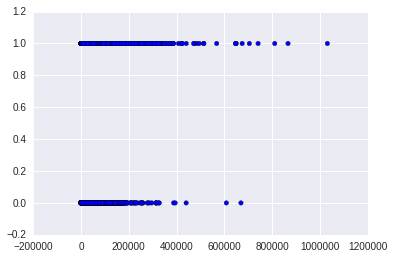

In [61]:
plt.scatter(df.total_credit_rv, df.loan_status)

### Plotting against tot_cur_bal

In [65]:
df.tot_cur_bal

3      38566
5      64426
6      17281
11    397223
12     10133
17     20539
24       744
28    237795
29    239362
32    256696
35    128450
37     59623
40     53901
50     47115
55     15894
...
235599    383345
235600     34157
235601    297745
235603     32971
235605    116175
235606    197078
235608     13021
235609    334899
235616    125641
235619    259863
235620    116995
235621     42592
235622     10170
235625    221830
235626    591610
Name: tot_cur_bal, Length: 71364, dtype: float64

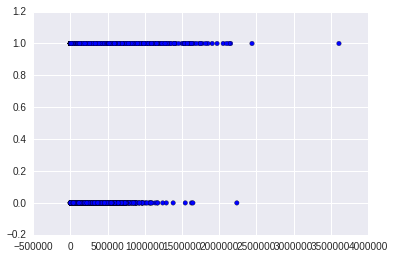

In [66]:
plt.scatter(df.tot_cur_bal, df.loan_status)

### Plotting against tot_coll_amt

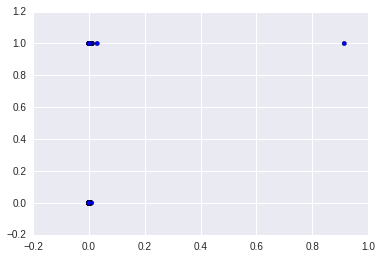

In [68]:
plt.scatter(df.tot_coll_amt/10e6, df.loan_status)

##### The above plot is intersting, Kaustabh take a look

### Plotting against acc_now_delinq

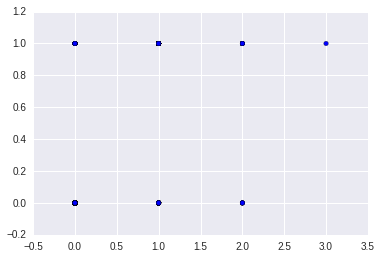

In [69]:
plt.scatter(df.acc_now_delinq, df.loan_status)

#### This shows that if a person has 3 deliquent accounts, then he is definitely 1(good). This is counter intuitive

In [72]:
df.acc_now_delinq[df.acc_now_delinq == 3]

145595    3
Name: acc_now_delinq, dtype: float64

#### But we can see that there is only one person who has 3 deliquencies, so this is an outlier

### Removing application_type

In [77]:
len(df.application_type[df.application_type == 'INDIVIDUAL'])/len(df.application_type)

1

#### We can see that there is only one type of 'application_type', so we can remove it

In [78]:
df = df.drop(['application_type'], axis=1)

### Removing policy_code

In [84]:
len(df.policy_code[df.policy_code == 1])/len(df.policy_code)

1

#### We can see that there is only one type of 'policy_code', so we can remove it

In [85]:
df = df.drop(['policy_code'], axis=1)

### Plotting against collections_12_mths_ex_med

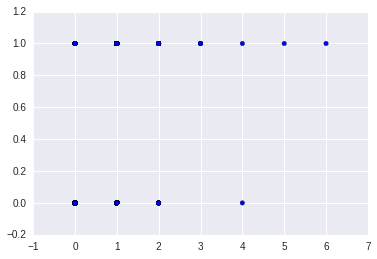

In [89]:
plt.scatter(df.collections_12_mths_ex_med, df.loan_status)

### Plotting against mths_since_last_major_derog 

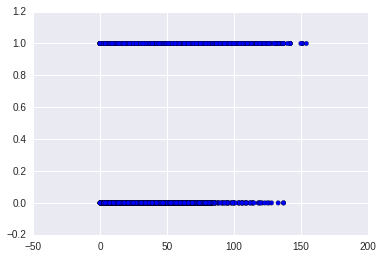

In [91]:
plt.scatter(df.mths_since_last_major_derog , df.loan_status)

### Dealing with last_credit_pull_d

In [92]:
df.last_credit_pull_d

3     Dec-2015
5     Dec-2015
6     Dec-2015
11    Dec-2015
12    Apr-2015
17    Dec-2015
24    Mar-2015
28    Dec-2015
29    Dec-2015
32    Oct-2015
35    Dec-2015
37    Jan-2015
40    Dec-2015
50    Jun-2015
55    Aug-2015
...
235599    Aug-2015
235600    Dec-2015
235601    Dec-2015
235603    Dec-2015
235605    Apr-2015
235606    Dec-2015
235608    Sep-2015
235609    Dec-2015
235616    Oct-2015
235619    Dec-2015
235620    Oct-2014
235621    Oct-2014
235622    Dec-2015
235625    Dec-2015
235626    Apr-2015
Name: last_credit_pull_d, Length: 71364, dtype: object

In [98]:
df.last_credit_pull_d = pd.to_datetime(df.last_credit_pull_d)

#### Someone try to plot this datetime against loan_status

### Dealing with collection_recovery_fee

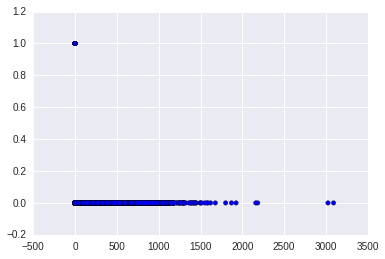

In [112]:
plt.scatter(df.collection_recovery_fee, df.loan_status)

In [119]:
len(df.collection_recovery_fee[df.loan_status == 1][df.collection_recovery_fee == 0])/len(df.collection_recovery_fee[df.loan_status == 1])

1

#### All good people have collection_recovery_fee = 0

### Dealing with recoveries 

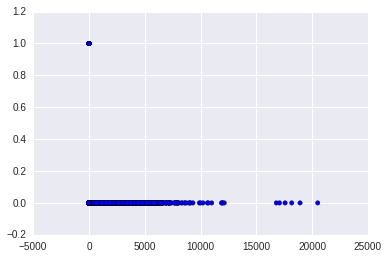

In [123]:
plt.scatter(df.recoveries, df.loan_status)

#### All good people have recoveries = 0

### Plotting against total_rec_int

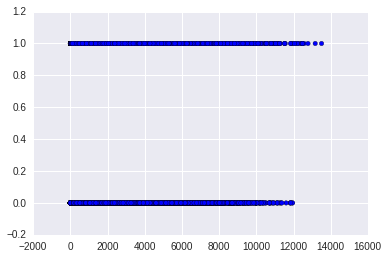

In [125]:
plt.scatter(df.total_rec_int, df.loan_status)

### Plotting against total_rec_late_fee

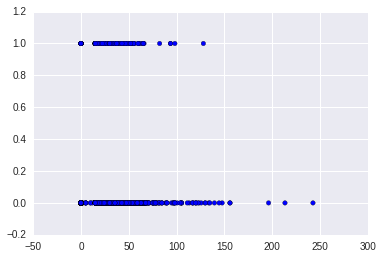

In [127]:
plt.scatter(df.total_rec_late_fee, df.loan_status)

#### We can observe that if total_rec_late_fee is > 140 then the is definetely bad

### Plotting against total_rec_prncp

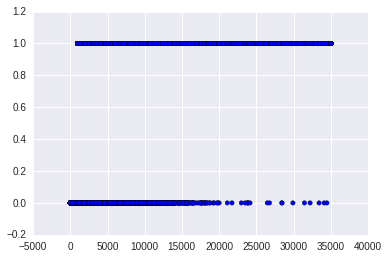

In [129]:
plt.scatter(df.total_rec_prncp, df.loan_status)

### Plotting against total_pymnt_inv & total_pymnt

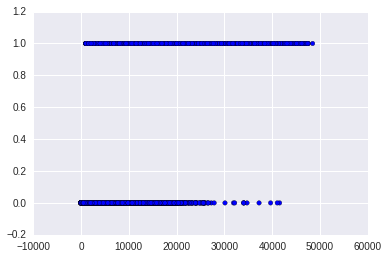

In [131]:
plt.scatter(df.total_pymnt_inv, df.loan_status)

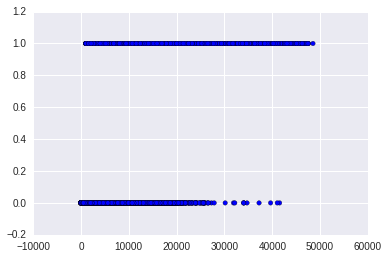

In [132]:
plt.scatter(df.total_pymnt, df.loan_status)

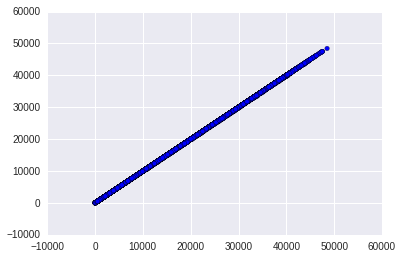

In [133]:
plt.scatter(df.total_pymnt, df.total_pymnt_inv)

#### We can see that there is linear relation between there 2 columns

In [137]:
df.corr()['total_pymnt']['total_pymnt_inv']

0.99999770105624086

#### And this is also supported by correlation also, which is 0.99999

### Plotting against out_prncp

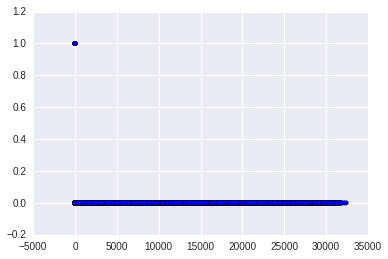

In [139]:
plt.scatter(df.out_prncp, df.loan_status)